In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
dataset = pd.read_csv('Mall_Customers.csv')

In [52]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [54]:
dataset = dataset.drop('CustomerID', axis = 1) 
dataset = dataset.drop('Genre', axis = 1) 
dataset.fillna(method ='ffill', inplace = True) 
dataset.head(5)

C:\Users\PrakashBaskaran\AppData\Local\Temp\ipykernel_32196\3228503637.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method ='ffill', inplace = True)


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [58]:
# Preprocessing the data to make it visualizable 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(dataset) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2) 

,P1,P2
0,-0.358146,-0.808495
1,-0.634308,-0.729439


In [60]:
X_principal

,P1,P2
0,-0.358146,-0.808495
1,-0.634308,-0.729439
2,-0.030129,-0.656543
3,-0.594864,-0.763586
4,-0.067077,-0.936304
...,...,...
195,-0.406855,0.902477
196,0.224251,0.960825
197,-0.418808,0.922596
198,-0.005494,0.898722


In [28]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels = sc.fit_predict(X_principal)

C:\Users\PrakashBaskaran\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 618 with accuracies 
[3.74311850e-15 3.52882874e-06 2.79782912e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 532 instead with accuracy 
1.6840558510107166e-06.

  _, diffusion_map = lobpcg(
C:\Users\PrakashBaskaran\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[2.13419462e-15 9.44327284e-07 4.10784049e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(
C:\Users\PrakashBaskaran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [62]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

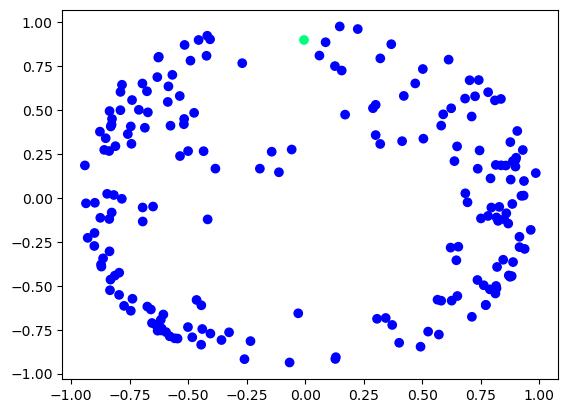

In [64]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = labels, cmap =plt.cm.winter) 
plt.show() 

In [66]:
supervised=dataset

In [68]:
supervised['Cluster_group']=labels

In [70]:
supervised

,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,0
198,32,137,18,1


In [72]:
supervised.to_csv("spectral_cluster.csv",index=False)

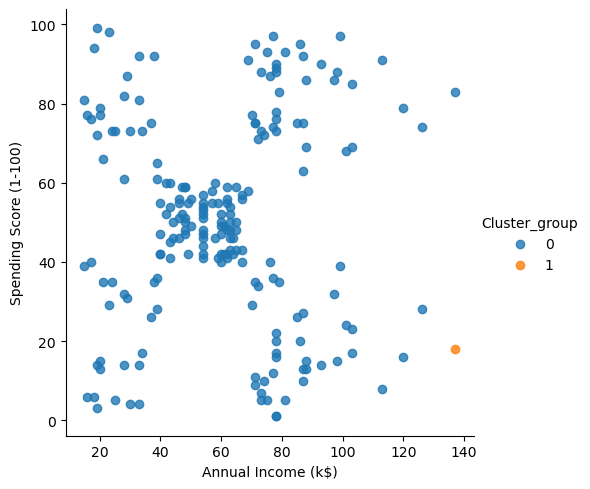

In [76]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[1], y=supervised.columns[2], hue=supervised.columns[3], 
                   fit_reg=False, legend=True)